In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np 

In [19]:
root = os.path.dirname(os.getcwd())
print("root direction", root)

temp = 0
num = 0
for root, dirs, files in os.walk(r"D:\肠癌影像病理\病理配对\第一部分"):
    for file in files:
        # print(root)
        
        value = file[:6]
        if value == temp:
            continue
        else:
            temp = value
            num += 1
            print(value)
            print(file)
print(num)

root direction f:\Project\AMH
467933
467933 10.svs
467951
467951 1A,1B.svs
468586
468586 1A,1B.svs
468599
468599 1A,1B.svs
468710
468710 1A,1B.svs
469052
469052 1A,1B.svs
469629
469629 1A,1B.svs
469793
469793 1A,1B.svs
470007
470007 1A,1B.svs
470349
470349 1A,1B.svs
470510
470510 1A,1B.svs
470914
470914 1B,1C.svs
471422
471422 1A,1B.svs
471560
471560 1,2.svs
471618
471618 1A,1B.svs
471665
471665 1A,1B.svs
472014
472014 1,2A.svs
472405
472405 1,2.svs
472883
472883 1,2.svs
473498
473498 1A,1B.svs
473790
473790 1A,1B.svs
473887
473887 1A,1B.svs
473889
473889 1,2A.svs
473995
473995 1A,1B.svs
474435
474435 1,2A.svs
474981
474981 1A,1B.svs
474984
474984 1A,1B.svs
475077
475077 1A,1B.svs
475337
475337 1A,1B.svs
475537
475537 1A,1B.svs
475750
475750 1A,1B.svs
476007
476007 1,2.svs
476119
476119 1A,1B.svs
476630
476630 1A,1B.svs
477005
477005 1A,1B.svs
477009
477009 1A,1B.svs
477123
477123 1A,1B.svs
477583
477583 1,2.svs
477796
477796 2,3.svs
477811
477811 10.svs
478424
478424 1,2A.svs
478461
4

In [11]:
root = os.path.dirname(os.getcwd())
print("root direction", root)

label_path = root + '/muldataset/label.csv'
print(label_path)

df = pd.read_csv(label_path)
# print(df)
df_folder = df['folder'].values.tolist()
df_dep = df['depression'].values.tolist()
df_inter = df['interpersonal tension'].values.tolist()
df_anx = df['anxiety'].values.tolist()
df_obs = df['obsessive-compulsive'].values.tolist()
df_par = df['paranoia'].values.tolist()
df_hos = df['hostility'].values.tolist()
df_aca = df['academic stress'].values.tolist()
df_mal = df['maladjustment'].values.tolist()
df_emo = df['emotional imbalance'].values.tolist()
df_psy = df['psychological imbalance'].values.tolist()
df_label = df['overall condition'].values.tolist()
df_sui = df['suicidal tendency'].values.tolist()
# print(df_folder)
print(df_folder[409])
# labels = df_label[:410]
# labels = df_label[410:]
labels = [df_dep] + [df_inter] + [df_anx] + [df_obs] + [df_par] + [df_hos] + \
    [df_aca] + [df_mal] + [df_emo] + [df_psy] + [df_sui]
print(np.array(labels).shape)

root direction f:\Project\AMH
f:\Project\AMH/muldataset/label.csv
00004-0104
(11, 1101)


In [12]:
root = os.path.dirname(os.getcwd())

df = pd.read_csv(root + '/muldataset/delete_index.csv', usecols=[1])
df_wrg = df['delete_index'].values.tolist()
delete_folder_index = df_wrg

In [13]:
labels = np.array(labels)
for i in range(len(labels[0]), 0, -1):
    if i in delete_folder_index:
        labels = np.delete(np.array(labels), i, axis=1)
# labels = labels.T
print(np.array(labels).shape)

(11, 968)


In [14]:
# labels = labels.tolist()

temp_heat = np.zeros((11,11))
print(temp_heat.shape)
print(np.array(labels).shape)
for i in range(labels.shape[0]):
    # print(labels[i])
    index = 0
    for j in labels[i]:
        if j == 1:
            temp_col = labels[:, index]
            # print(temp_col)
            for k in range(len(temp_col)):
                if temp_col[k] == 1:
                    temp_heat[i][k] += 1
            # print(temp_heat)
        index += 1
print(temp_heat)

(11, 11)
(11, 968)
[[261. 141. 191. 167. 110. 127. 189.  93. 168.  74. 123.]
 [141. 190. 148. 135. 114. 105. 138.  81. 140.  70.  95.]
 [191. 148. 298. 189. 131. 141. 208.  98. 198.  78. 111.]
 [167. 135. 189. 364. 123. 115. 207.  93. 203.  83. 100.]
 [110. 114. 131. 123. 165. 102. 118.  83. 129.  69.  78.]
 [127. 105. 141. 115. 102. 175. 136.  80. 135.  65.  86.]
 [189. 138. 208. 207. 118. 136. 366. 102. 215.  84. 113.]
 [ 93.  81.  98.  93.  83.  80. 102. 128.  98.  63.  50.]
 [168. 140. 198. 203. 129. 135. 215.  98. 302.  91. 108.]
 [ 74.  70.  78.  83.  69.  65.  84.  63.  91. 102.  46.]
 [123.  95. 111. 100.  78.  86. 113.  50. 108.  46. 194.]]


In [33]:
root = os.path.dirname(os.getcwd())

df = pd.read_excel(root + '/ablation.xlsx', engine='openpyxl').values.tolist()
df  = np.array(df)
# print(df)
acc = df[0]
f1 = df[1]

# data = df[2:12] #acc
data = df[12:-1] #f1
data = np.array(data).T
print(data)

[[0.80863476 0.81125056 0.8133011  0.81127466 0.82802558 0.81959732
  0.81458935 0.81439032 0.81088144 0.81769562]
 [0.7075074  0.70011927 0.7039744  0.69651766 0.70072968 0.71584531
  0.69841793 0.68775616 0.71220193 0.69471261]
 [0.7689726  0.77773995 0.75720771 0.7731224  0.77576379 0.77469832
  0.77786654 0.77484519 0.78203559 0.77910387]
 [0.66978053 0.68127828 0.67859294 0.66074627 0.68914315 0.65957653
  0.67696302 0.66512887 0.67309402 0.64797969]
 [0.64655927 0.64717685 0.65234548 0.64440264 0.65397857 0.63906925
  0.63698231 0.64224889 0.65605913 0.62457413]
 [0.79978477 0.78970063 0.7881146  0.7974244  0.79649563 0.79248557
  0.79327031 0.79212577 0.78805158 0.78751587]
 [0.78081453 0.79005571 0.78317715 0.7875433  0.7903309  0.78710004
  0.78061656 0.79146582 0.77772116 0.78317597]
 [0.65593881 0.66225623 0.67427734 0.66837698 0.66748996 0.66451848
  0.66669418 0.66409992 0.66447856 0.66261774]
 [0.82826345 0.83627284 0.83458766 0.83757507 0.83293663 0.83008714
  0.82514614

In [34]:
heatmap = []

# print(acc, f1)
for i in range(12):
    # print(data[i])
    benchmark = f1[i]
    # print(benchmark)
    for j in data[i]:
        j = j - benchmark
        heatmap.append(j)
heatmap = np.array(heatmap).reshape(12, -1).T
print(heatmap)
# df = pd.DataFrame(data=heatmap,
#                       columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
# df.to_csv('./relationship.csv',index=False)
print(np.sum(heatmap, axis=1))

[[-0.06629023 -0.06049131 -0.05867628 -0.078492   -0.06665381 -0.03615682
  -0.05458892 -0.07462227 -0.04821009 -0.07880579 -0.0391488  -0.06370148]
 [-0.06367443 -0.06787944 -0.04990893 -0.06699425 -0.06603623 -0.04624095
  -0.04534774 -0.06830484 -0.0402007  -0.07098771 -0.04656194 -0.0645462 ]
 [-0.06162389 -0.06402431 -0.07044117 -0.06967958 -0.0608676  -0.04782698
  -0.0522263  -0.05628373 -0.04188587 -0.0726685  -0.04385481 -0.0707002 ]
 [-0.06365033 -0.07148105 -0.05452648 -0.08752625 -0.06881044 -0.03851718
  -0.04786015 -0.06218409 -0.03889847 -0.06276485 -0.03591008 -0.04190775]
 [-0.04689941 -0.06726903 -0.05188509 -0.05912937 -0.05923451 -0.03944596
  -0.04507255 -0.06307111 -0.0435369  -0.05533593 -0.04105795 -0.05913563]
 [-0.05532767 -0.05215341 -0.05295057 -0.088696   -0.07414384 -0.04345601
  -0.04830341 -0.06604259 -0.04638639 -0.0832962  -0.04087387 -0.05797844]
 [-0.06033563 -0.06958078 -0.04978235 -0.0713095  -0.07623078 -0.04267127
  -0.05478689 -0.06386689 -0.051

In [17]:
heatmap = []
for i in range(11):
    # print(temp_heat[i])
    benchmark = temp_heat[i][i]
    for j in temp_heat[i]:
        j = j / benchmark
        heatmap.append(j)
heatmap = np.array(heatmap).reshape(11,11)
print(heatmap)
# df = pd.DataFrame(data=heatmap,
#                       columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
# df.to_csv('./test.csv',index=False)

[[1.         0.54022989 0.73180077 0.63984674 0.42145594 0.48659004
  0.72413793 0.35632184 0.64367816 0.2835249  0.47126437]
 [0.74210526 1.         0.77894737 0.71052632 0.6        0.55263158
  0.72631579 0.42631579 0.73684211 0.36842105 0.5       ]
 [0.6409396  0.4966443  1.         0.63422819 0.43959732 0.47315436
  0.69798658 0.32885906 0.66442953 0.26174497 0.37248322]
 [0.45879121 0.37087912 0.51923077 1.         0.33791209 0.31593407
  0.56868132 0.25549451 0.55769231 0.22802198 0.27472527]
 [0.66666667 0.69090909 0.79393939 0.74545455 1.         0.61818182
  0.71515152 0.5030303  0.78181818 0.41818182 0.47272727]
 [0.72571429 0.6        0.80571429 0.65714286 0.58285714 1.
  0.77714286 0.45714286 0.77142857 0.37142857 0.49142857]
 [0.51639344 0.37704918 0.56830601 0.56557377 0.32240437 0.3715847
  1.         0.27868852 0.58743169 0.2295082  0.30874317]
 [0.7265625  0.6328125  0.765625   0.7265625  0.6484375  0.625
  0.796875   1.         0.765625   0.4921875  0.390625  ]
 [0.55

In [8]:
# df_folder = df['folder'].values.tolist()
df_dep = df['depression'].values.tolist()
df_inter = df['interpersonal tension'].values.tolist()
df_anx = df['anxiety'].values.tolist()
df_obs = df['obsessive-compulsive'].values.tolist()
df_par = df['paranoia'].values.tolist()
df_hos = df['hostility'].values.tolist()
df_aca = df['academic stress'].values.tolist()
df_mal = df['maladjustment'].values.tolist()
df_emo = df['emotional imbalance'].values.tolist()
df_psy = df['psychological imbalance'].values.tolist()
df_label = df['overall condition'].values.tolist()
df_sui = df['suicidal tendency'].values.tolist()

KeyError: 'depression'

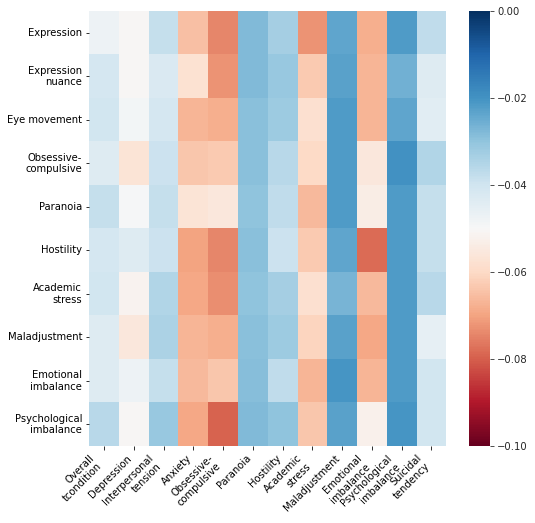

In [32]:
import matplotlib.pyplot as plt

# sns.set_context({"figure.figsize":(6,6)})

x = ['Overall\ntcondition', 'Depression', 'Interpersonal\ntension', 'Anxiety', 'Obsessive-\ncompulsive', 'Paranoia', 'Hostility', 'Academic\nstress', \
    'Maladjustment', 'Emotional\nimbalance', 'Psychological\nimbalance', 'Suicidal\ntendency' ]
y = ['Expression', 'Expression\nnuance', 'Eye movement', 'Obsessive-\ncompulsive', 'Paranoia', 'Hostility', 'Academic\nstress', \
    'Maladjustment', 'Emotional\nimbalance', 'Psychological\nimbalance' ]
pd_data=pd.DataFrame(heatmap,index=y,columns=x)
# sns.set(font_scale=1.5)
#随机生成一个200行10列的数据集 
# data_new = np.random.randn(200,10) 
# corr = np.corrcoef(heatmap, rowvar=False) 
# print(corr)
#以corr的形状生成一个全为0的矩阵 
mask = np.zeros_like(pd_data)
# mask[np.triu_indices_from(mask)] = True
#将mask的对角线及以上设置为True
# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,8))
with sns.axes_style("white"):
    sns.heatmap(pd_data, mask=mask, vmax=0.0, vmin= -0.1, \
         cmap="RdBu", ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')

plt.savefig('./1.pdf', dpi=600, bbox_inches='tight')
# scatter_fig = fig.get_figure()
# scatter_fig.savefig('./1.pdf', dpi=600, bbox_inches='tight')

In [108]:
import pandas as pd

df_confs = pd.read_csv('./Total_confs.csv')
# print(df_confs['Overall health status'])
data = df_confs['Overall health status'].tolist()
print(data)
print(np.array(data).shape)
total = np.array(data).reshape(-1, 4)
print(total)
data_sum = np.sum(total, axis=0).reshape(2,2)
print(data_sum)
# print(np.sum(data_sum, axis=0) )
print(np.sum(data_sum, axis=1))

[81, 0, 11, 5, 81, 0, 11, 5, 81, 0, 11, 5, 81, 0, 7, 9, 79, 1, 11, 6, 79, 1, 8, 9, 79, 1, 11, 6, 76, 4, 7, 10, 78, 2, 8, 8, 80, 0, 10, 6]
(40,)
[[81  0 11  5]
 [81  0 11  5]
 [81  0 11  5]
 [81  0  7  9]
 [79  1 11  6]
 [79  1  8  9]
 [79  1 11  6]
 [76  4  7 10]
 [78  2  8  8]
 [80  0 10  6]]
[[795   9]
 [ 95  69]]
[804 164]


[78, 0, 16, 3, 78, 0, 16, 3, 78, 0, 13, 6, 78, 0, 11, 8, 74, 3, 12, 8, 77, 0, 15, 5, 76, 1, 14, 6, 76, 1, 12, 8, 77, 0, 14, 5, 76, 1, 12, 7]
(40,)
[[78  0 16  3]
 [78  0 16  3]
 [78  0 13  6]
 [78  0 11  8]
 [74  3 12  8]
 [77  0 15  5]
 [76  1 14  6]
 [76  1 12  8]
 [77  0 14  5]
 [76  1 12  7]]
[[768   6]
 [135  59]]
[774 194]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

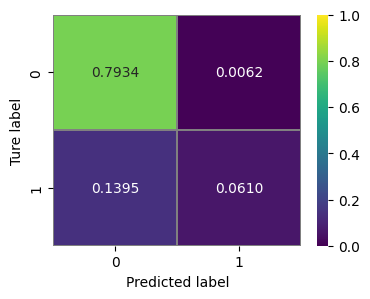

In [126]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

df_confs = pd.read_csv('./Total_confs.csv')
# print(df_confs['Overall health status'])
data = df_confs['Suicidal tendency'].tolist()
print(data)
print(np.array(data).shape)
total = np.array(data).reshape(-1, 4)
print(total)
data_sum = np.sum(total, axis=0).reshape(2,2)
print(data_sum)
# print(np.sum(data_sum, axis=0) )
print(np.sum(data_sum, axis=1))
 
classes = ["Positive", "Negative"]
 

gt_labels = np.r_[np.zeros(np.sum(data_sum, axis=1)[0]), np.ones(np.sum(data_sum, axis=1)[1])]
print(gt_labels)
pred_labels = np.r_[np.zeros(data_sum[0][0]), np.ones(data_sum[0][1]), np.zeros(data_sum[1][0]), np.ones(data_sum[1][1])]
print(gt_labels)
 
# 使用sklearn工具中confusion_matrix方法计算混淆矩阵
confusion_mat = confusion_matrix(gt_labels, pred_labels)
print("confusion_mat.shape : {}".format(confusion_mat.shape))
print("confusion_mat : {}".format(confusion_mat))
 
cm_normalized = confusion_mat / 968
print(cm_normalized)

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm_normalized, annot=True, linecolor='gray', linewidths = 0.05, ax = ax, fmt='.4f', cmap = "viridis", vmin=0.0, vmax=1.0)
# ax.set_title('Normalized confusion matrix')
ax.set_xlabel('Predicted label', fontsize=10)
ax.set_ylabel('Ture label', fontsize=10)


plt.savefig('./confs_.pdf', bbox_inches='tight', dpi=300)
plt.show()